In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("timestamp%2Caltitude_m%2Clatitude%2Clongitude%2Cbattery_vo.csv")

In [3]:
#Displaying original file data to clean up
df 

,timestamp,altitude_m,latitude,longitude,battery_voltage,flight_mode
0,0,0.2,13.3490,74.7421,12.6,MANUAL
1,1,5.1,13.3492,74.7423,12.5,AUTO
2,2,10.3,13.3494,74.7425,12.4,AUTO
3,3,14.8,13.3496,74.7427,12.2,AUTO
4,4,20.1,13.3498,74.7429,12.1,NaN
5,5,25.3,13.3500,74.7431,0.0,AUTO
6,6,NaN,13.3502,74.7433,11.9,AUTO
7,7,35.2,13.3504,74.7435,11.8,AUTO
8,8,40.1,13.3506,74.7437,11.8,AUTO
9,9,5000.0,13.3508,74.7439,11.7,AUTO


In [4]:
ALT_MIN = 0
ALT_MAX = 120   

In [5]:
#THIS IS NOISE REMOVAL:

invalid_mask = (df['altitude_m'] < ALT_MIN) | (df['altitude_m'] > ALT_MAX)
print(f"\nNumber of altitude readings outside {ALT_MIN}-{ALT_MAX} m:", invalid_mask.sum())


Number of altitude readings outside 0-120 m: 2


In [6]:
df_clean = df[~invalid_mask].copy()

In [7]:
#HANDLING MISSING VALUES:

df_clean['altitude_m'] = df_clean['altitude_m'].ffill()
df_clean['altitude_m'] = df_clean['altitude_m'].fillna(df_clean['altitude_m'].mean())

In [8]:
df_clean['latitude'] = df_clean['latitude'].ffill()
df_clean['longitude'] = df_clean['longitude'].ffill()

In [9]:
df_clean['flight_mode'] = df_clean['flight_mode'].ffill()

In [10]:
df_clean['battery_voltage'] = df_clean['battery_voltage'].ffill()

In [11]:
#SAVING CLEAN DATA TO A FILE NAMED CleanData.csv

df_clean.to_csv("CleanData.csv", index=False)

CleanData = pd.read_csv("CleanData.csv")

print("\n=== CLEAN DATA FILE (First 10 Rows) ===")
CleanData.head(10) 
print("\nINFO OF CleanData FILE: \n")
CleanData.info()

#ROWS REMOVED
print(f"\nRows before cleaning: {df.shape[0]}")
print(f"Rows after cleaning: {df_clean.shape[0]}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")





=== CLEAN DATA FILE (First 10 Rows) ===

INFO OF CleanData FILE: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        19 non-null     int64  
 1   altitude_m       19 non-null     float64
 2   latitude         19 non-null     float64
 3   longitude        19 non-null     float64
 4   battery_voltage  19 non-null     float64
 5   flight_mode      19 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.0+ KB

Rows before cleaning: 21
Rows after cleaning: 19
Rows removed: 2


In [12]:
print("\nAfter cleaning, any nulls?")
print(df_clean.isna().sum())


After cleaning, any nulls?
timestamp          0
altitude_m         0
latitude           0
longitude          0
battery_voltage    0
flight_mode        0
dtype: int64


In [13]:
alt_mean = df_clean['altitude_m'].mean()
alt_max = df_clean['altitude_m'].max()
alt_min = df_clean['altitude_m'].min()

In [14]:
bat_mean = df_clean['battery_voltage'].mean()
bat_min = df_clean['battery_voltage'].min()
bat_max = df_clean['battery_voltage'].max()

In [15]:
print("\n=== STATISTICS ===")
print(f"Altitude → mean: {alt_mean:.2f} m, min: {alt_min:.2f} m, max: {alt_max:.2f} m")
print(f"Battery  → mean: {bat_mean:.2f} V, min: {bat_min:.2f} V, max: {bat_max:.2f} V")


=== STATISTICS ===
Altitude → mean: 31.19 m, min: 0.10 m, max: 50.10 m
Battery  → mean: 11.77 V, min: 0.00 V, max: 25.50 V


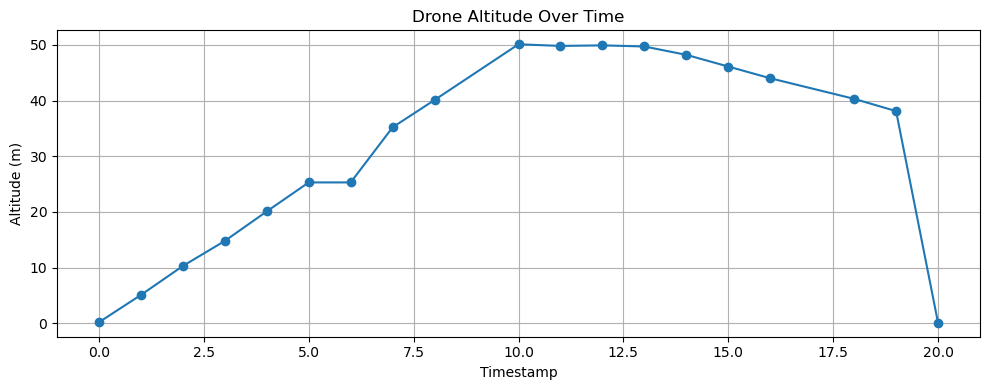

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(df_clean['timestamp'], df_clean['altitude_m'], marker='o')
plt.title("Drone Altitude Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Altitude (m)")
plt.grid(True)
plt.tight_layout()
plt.show()

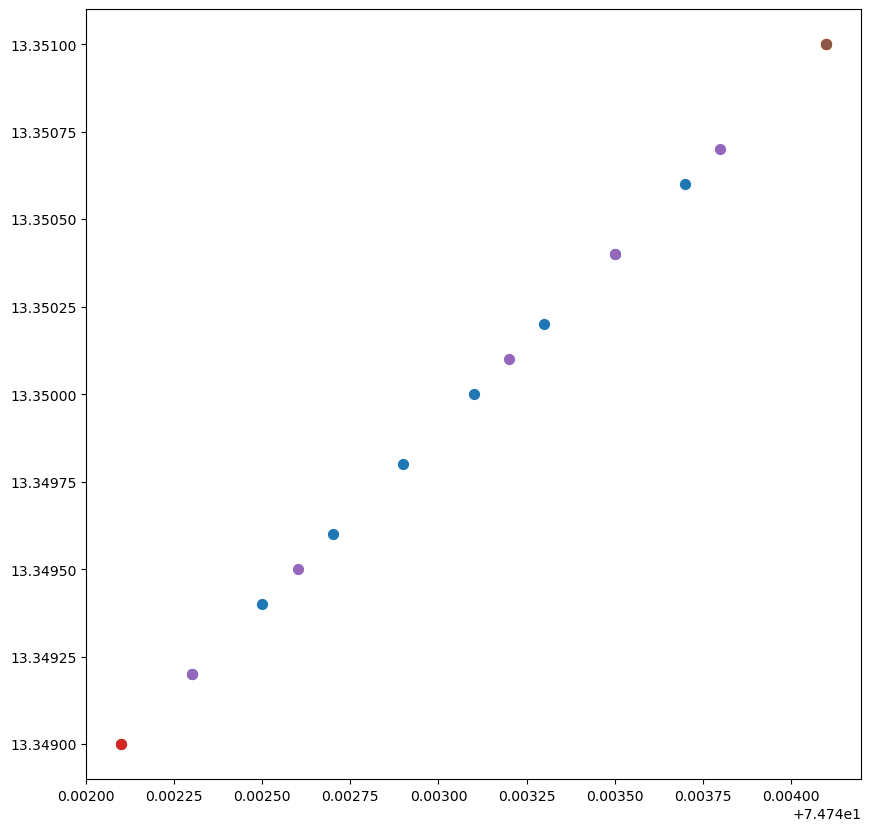

In [17]:
plt.figure(figsize=(10, 10))
for mode, group in df_clean.groupby('flight_mode'):
    plt.scatter(group['longitude'], group['latitude'], label=mode, s=50)

In [22]:
print(df_clean.shape)
print(df_clean[['latitude', 'longitude', 'flight_mode']].head(10))


(19, 6)
    latitude  longitude flight_mode
0    13.3490    74.7421      MANUAL
1    13.3492    74.7423        AUTO
2    13.3494    74.7425        AUTO
3    13.3496    74.7427        AUTO
4    13.3498    74.7429        AUTO
5    13.3500    74.7431        AUTO
6    13.3502    74.7433        AUTO
7    13.3504    74.7435        AUTO
8    13.3506    74.7437        AUTO
10   13.3510    74.7441       HOVER


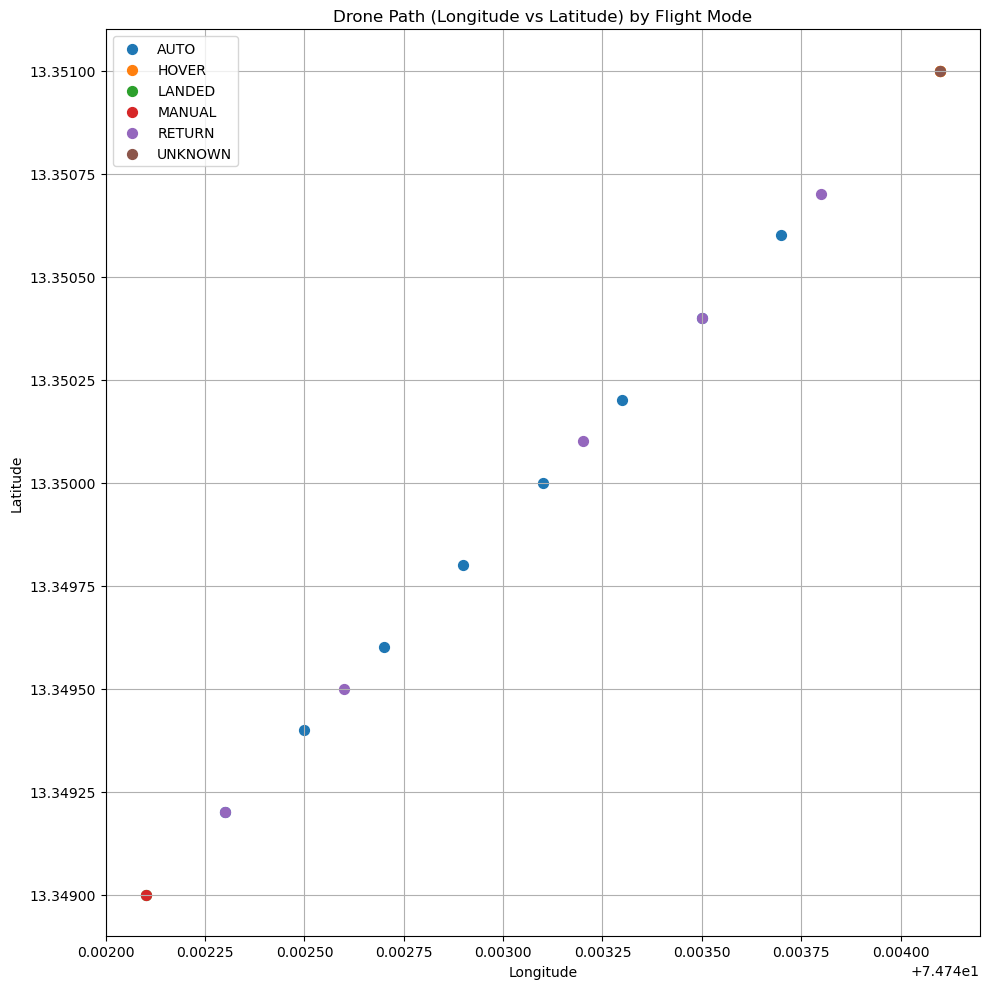

In [19]:
plt.figure(figsize=(10, 10))

# Plot longitude vs latitude grouped by flight mode
for mode, group in df_clean.groupby('flight_mode'):
    plt.scatter(group['longitude'], group['latitude'], label=mode, s=50)

plt.title("Drone Path (Longitude vs Latitude) by Flight Mode")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add legend only if data exists
if df_clean['flight_mode'].notna().any() and df_clean['flight_mode'].nunique() > 0:
    plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
#bruh